In [473]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

In [474]:
MINIMUM_PEPTIDE_SCORE = 30

In [475]:
my_results_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/F359609.csv', sep=',', index_col=False, skiprows=61)
my_results_df = my_results_df[my_results_df.pep_score >= MINIMUM_PEPTIDE_SCORE]


In [476]:
mq_results_df = pd.read_csv('/Users/darylwilding-mcbride/Downloads/F359466.csv', sep=',', index_col=False, skiprows=61)
mq_results_df = mq_results_df[mq_results_df.pep_score >= MINIMUM_PEPTIDE_SCORE]

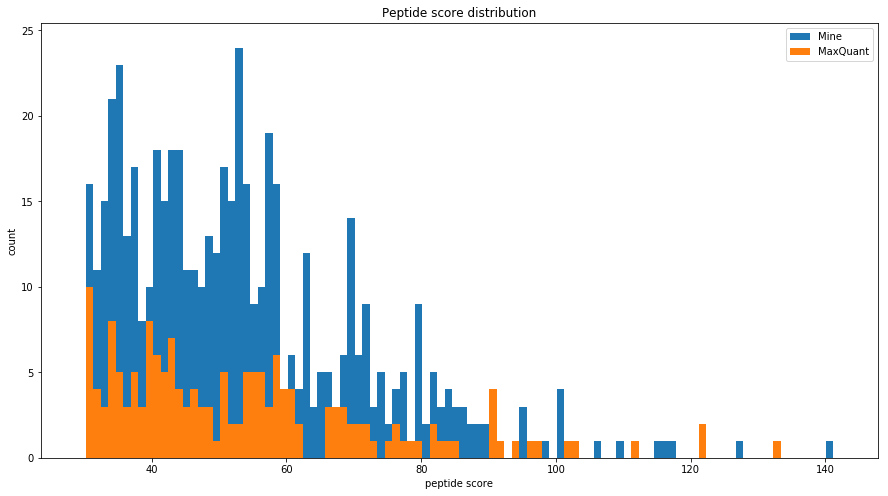

In [477]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide score distribution')

bins = 100
hist, bins, _ = plt.hist(my_results_df.pep_score, bins=bins, label='Mine')
hist, bins, _ = plt.hist(mq_results_df.pep_score, bins=bins, label='MaxQuant')
plt.legend(loc='best')
plt.xlabel('peptide score')
plt.ylabel('count')

plt.show()

In [478]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Rescale to values between 0 and 1
tableau20_mpl = tableau20.copy()
for i in range(len(tableau20_mpl)):  
    r, g, b = tableau20_mpl[i]  
    tableau20_mpl[i] = (r / 255., g / 255., b / 255.)

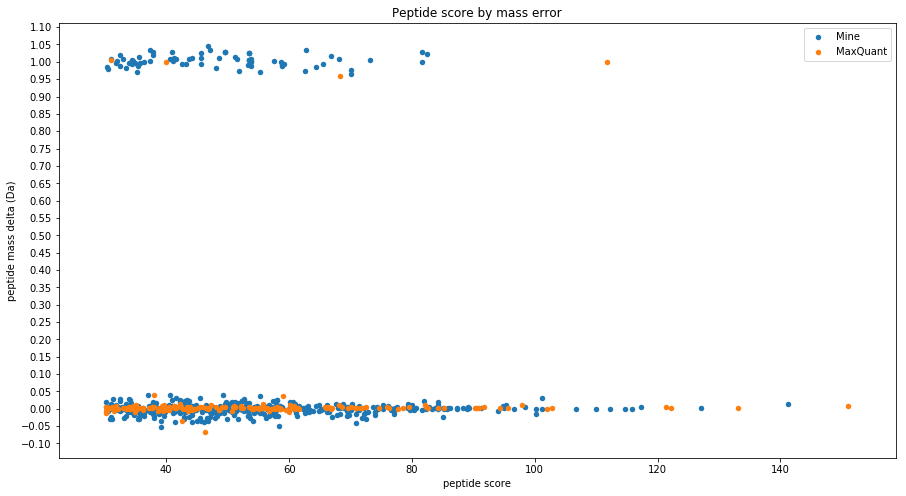

In [479]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide score by mass error')

ax.scatter(my_results_df.pep_score, my_results_df.pep_delta, marker='o', color=tableau20_mpl[0], lw=0, s=30, alpha=1.0, label="Mine")
ax.scatter(mq_results_df.pep_score, mq_results_df.pep_delta, marker='o', color=tableau20_mpl[2], lw=0, s=30, alpha=1.0, label="MaxQuant")

plt.legend(loc='best')
plt.xlabel('peptide score')
plt.ylabel('peptide mass delta (Da)')
plt.yticks(np.arange(-0.1,1.1,0.05))

plt.show()

In [480]:
# number of peptide matches
my_peptides = list(my_results_df.pep_seq.unique())
mq_peptides = list(mq_results_df.pep_seq.unique())

In [481]:
my_results_df.columns

Index(['prot_hit_num', 'prot_family_member', 'prot_acc', 'prot_desc',
       'prot_score', 'prot_mass', 'prot_matches', 'prot_matches_sig',
       'prot_sequences', 'prot_sequences_sig', 'pep_query', 'pep_rank',
       'pep_isbold', 'pep_isunique', 'pep_exp_mz', 'pep_exp_mr', 'pep_exp_z',
       'pep_calc_mr', 'pep_delta', 'pep_miss', 'pep_score', 'pep_expect',
       'pep_res_before', 'pep_seq', 'pep_res_after', 'pep_var_mod',
       'pep_var_mod_pos', 'pep_summed_mod_pos', 'pep_scan_title'],
      dtype='object')

In [482]:
intersection = len(set(mq_peptides).intersection(my_peptides))

In [483]:
print("my results had {} peptides, MQ had {} peptides, and there were {} in common".format(len(my_peptides), len(mq_peptides), intersection))

my results had 310 peptides, MQ had 149 peptides, and there were 115 in common


In [484]:
count_list = []
count_list.append(('PASEF', len(my_peptides)))
count_list.append(('MaxQuant', len(mq_peptides)))
count_list.append(('Common', intersection))

In [485]:
count_df = pd.DataFrame(count_list, columns=['method','peptide_count'])

In [486]:
count_df

,method,peptide_count
0,PASEF,310
1,MaxQuant,149
2,Common,115


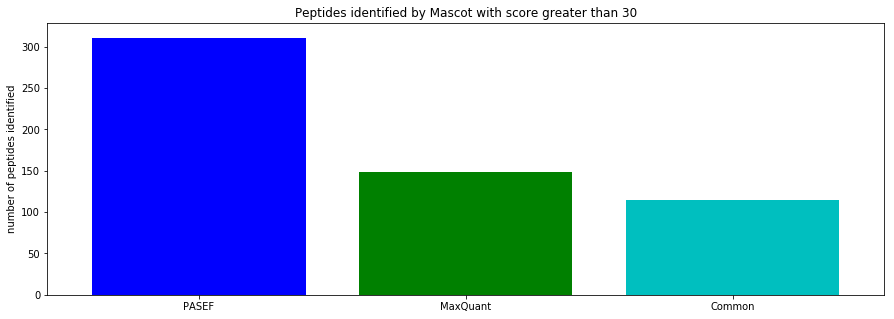

In [487]:
fig, ax1 = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(15)
plt.bar(count_df.iloc[0].method, count_df.iloc[0].peptide_count, align='center', width=0.8, color='b')
plt.bar(count_df.iloc[1].method, count_df.iloc[1].peptide_count, align='center', width=0.8, color='g')
plt.bar(count_df.iloc[2].method, count_df.iloc[2].peptide_count, align='center', width=0.8, color='c')
plt.ylabel('number of peptides identified')
plt.title('Peptides identified by Mascot with score greater than {}'.format(MINIMUM_PEPTIDE_SCORE))
plt.margins(0.06)
plt.show()

In [488]:
my_results_df.columns

Index(['prot_hit_num', 'prot_family_member', 'prot_acc', 'prot_desc',
       'prot_score', 'prot_mass', 'prot_matches', 'prot_matches_sig',
       'prot_sequences', 'prot_sequences_sig', 'pep_query', 'pep_rank',
       'pep_isbold', 'pep_isunique', 'pep_exp_mz', 'pep_exp_mr', 'pep_exp_z',
       'pep_calc_mr', 'pep_delta', 'pep_miss', 'pep_score', 'pep_expect',
       'pep_res_before', 'pep_seq', 'pep_res_after', 'pep_var_mod',
       'pep_var_mod_pos', 'pep_summed_mod_pos', 'pep_scan_title'],
      dtype='object')

In [489]:
my_results_df['feature_id'] = my_results_df.pep_scan_title.str.split(" ").apply(lambda x: int(x[7]))
ms1_features_df = pd.read_pickle('/Users/darylwilding-mcbride/Downloads/ms1_deduped_df.pkl')
my_results_df = pd.merge(my_results_df, ms1_features_df, how='left', left_on=['feature_id'], right_on=['feature_id'])

In [490]:
denom = (my_results_df.pep_calc_mr + (my_results_df.charge * PROTON_MASS)) / PROTON_MASS
pep_ppm = (my_results_df.pep_delta / denom) * 1e6
my_results_df['pep_ppm'] = round(pep_ppm).astype(int)

In [500]:
my_results_df = my_results_df[(my_results_df.pep_ppm > -100) & (my_results_df.pep_ppm < 100)]

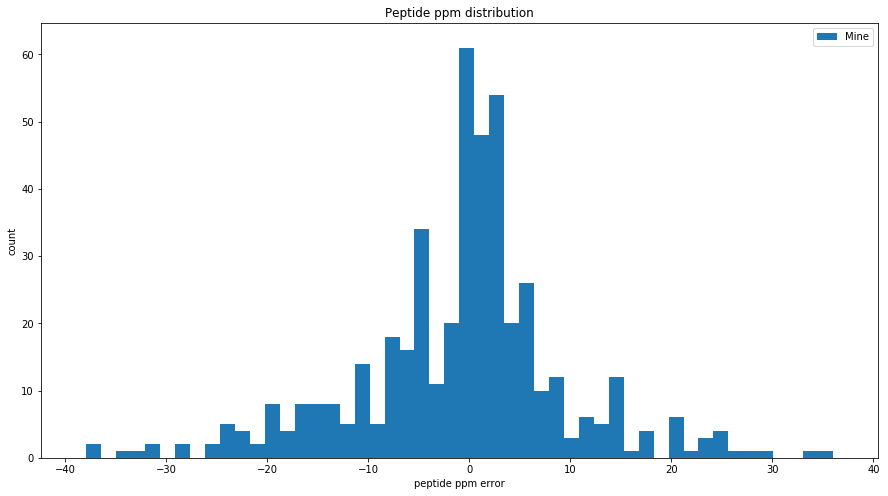

In [502]:
f, ax1 = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide ppm distribution')

bins = 50
hist, bins, _ = plt.hist(my_results_df.pep_ppm, bins=bins, label='Mine')
plt.legend(loc='best')
plt.xlabel('peptide ppm error')
plt.ylabel('count')

plt.show()

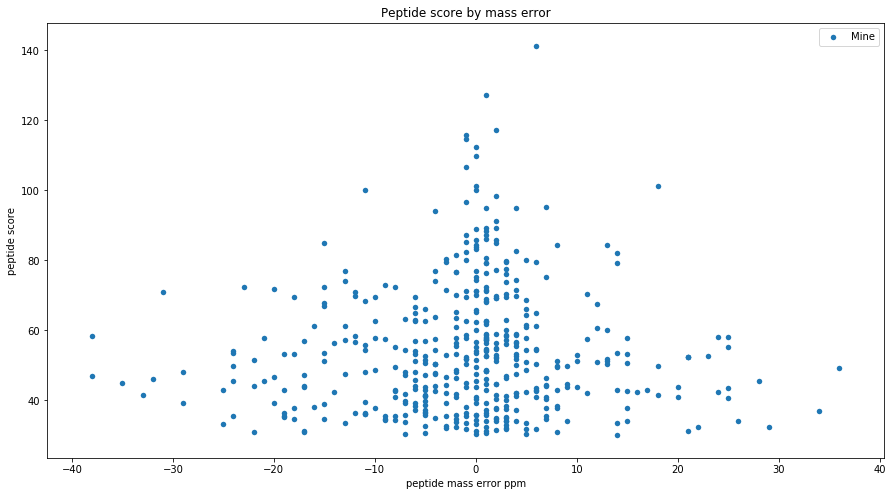

In [503]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('Peptide score by mass error')

ax.scatter(my_results_df.pep_ppm, my_results_df.pep_score, marker='o', color=tableau20_mpl[0], lw=0, s=30, alpha=1.0, label="Mine")

plt.legend(loc='best')
plt.xlabel('peptide mass error ppm')
plt.ylabel('peptide score')

plt.show()

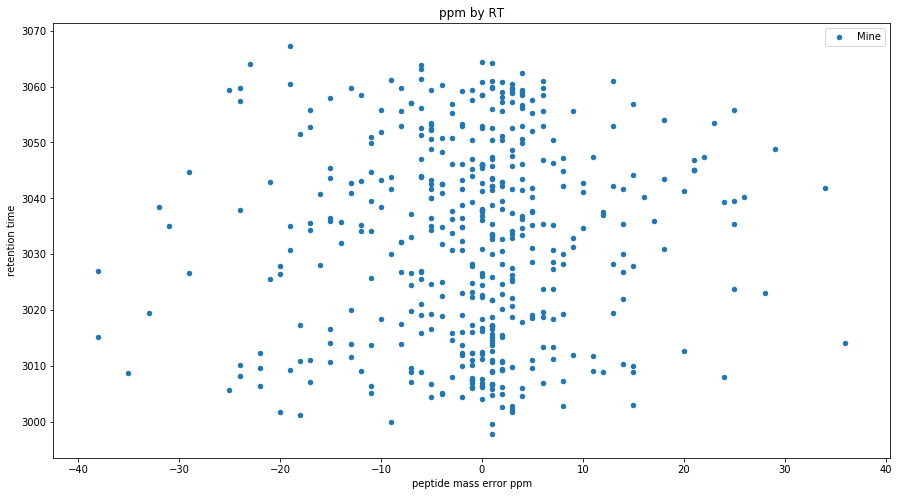

In [504]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('ppm by RT')

ax.scatter(my_results_df.pep_ppm, my_results_df.rt_apex, marker='o', color=tableau20_mpl[0], lw=0, s=30, alpha=1.0, label="Mine")

plt.legend(loc='best')
plt.xlabel('peptide mass error ppm')
plt.ylabel('retention time')

plt.show()

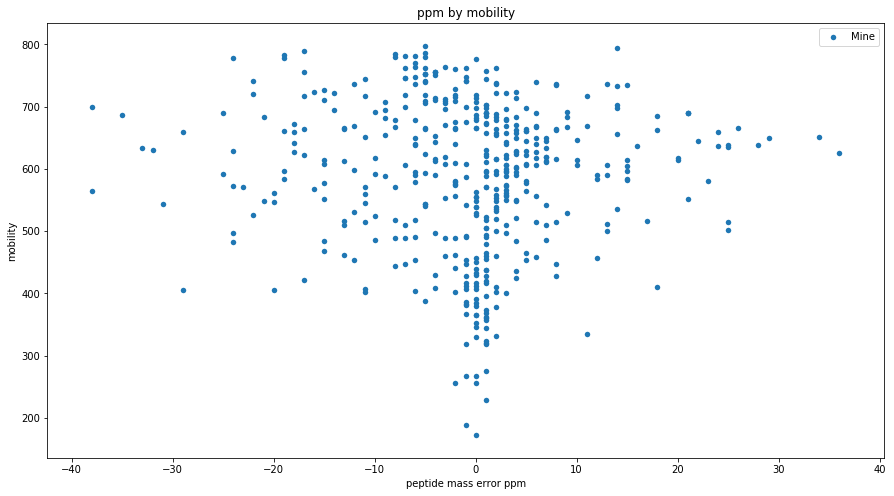

In [505]:
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(15)

plt.margins(0.06)
plt.title('ppm by mobility')

ax.scatter(my_results_df.pep_ppm, my_results_df.scan_apex, marker='o', color=tableau20_mpl[0], lw=0, s=30, alpha=1.0, label="Mine")

plt.legend(loc='best')
plt.xlabel('peptide mass error ppm')
plt.ylabel('mobility')

plt.show()